In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import graphviz
import itertools
#from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Project path
ppath = os.path.join(sys.path[0], '..//')

df = pd.read_csv(os.path.join(ppath, 'data', 'bank', 'train.csv'))
df.drop(['Surname'], axis=1, inplace=True)
df.drop(['Geography'], axis=1, inplace=True)
df.drop(['Gender'], axis=1, inplace=True)

In [2]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [3]:
df.columns

Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [4]:
# Select all rows and all columns except the last one
X = df.iloc[:, :-1]
# Select all rows and only the last column
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Accuracy: 0.8477595661526343
Confusion matrix:
 [[25136   715]
 [ 4310  2846]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     25851
           1       0.80      0.40      0.53      7156

    accuracy                           0.85     33007
   macro avg       0.83      0.69      0.72     33007
weighted avg       0.84      0.85      0.83     33007



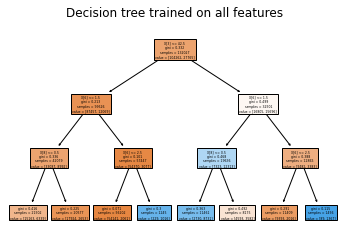

In [5]:
plt.figure()
clf = DecisionTreeClassifier(random_state=0,max_depth=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all features")
plt.show()

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(X.columns),  
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("bank-3") 

'bank-3.pdf'